In [6]:
import moderngl
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [7]:
%%file default.vert
#version 330

in vec2 in_vert;
in vec3 in_color;

out vec3 v_color;

void main() {

    v_color = in_color;
    gl_Position = vec4(in_vert, 0.0, 1.0);
}

Overwriting default.vert


In [8]:
%%file default.frag
#version 330

in vec3 v_color;
out vec3 f_color;

void main() {
   f_color = v_color;
}

Overwriting default.frag


In [9]:
ctx = moderngl.create_standalone_context()

with open('default.vert') as file:
    vertex_shader = file.read()
    
with open('default.frag') as file:
    fragment_shader = file.read()
    
print(vertex_shader + '\n')
print(fragment_shader)

#version 330

in vec2 in_vert;
in vec3 in_color;

out vec3 v_color;

void main() {

    v_color = in_color;
    gl_Position = vec4(in_vert, 0.0, 1.0);
}


#version 330

in vec3 v_color;
out vec3 f_color;

void main() {
   f_color = v_color;
}



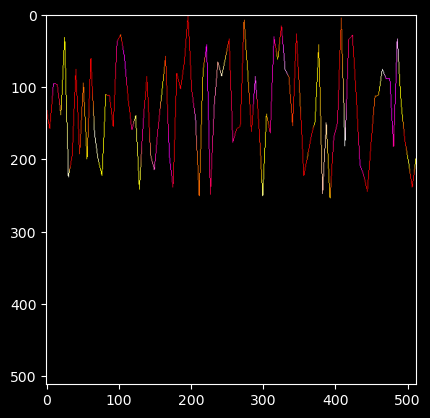

In [10]:
prog = ctx.program(vertex_shader=vertex_shader,fragment_shader=fragment_shader)

num_vert = 100

x = np.linspace(-1, 1, num_vert)
y = np.random.rand(num_vert)
r = np.ones(num_vert)
g = np.random.randn(num_vert)
b = np.random.randn(num_vert)
vertices = np.dstack([x, y, r, g, b])

vbo = ctx.buffer(vertices.astype('f4').tobytes())
vao = ctx.simple_vertex_array(prog, vbo, 'in_vert', 'in_color')
fbo = ctx.simple_framebuffer((512, 512))
fbo.use()
fbo.clear(.0, .0, .0, 1.0)

vao.render(moderngl.LINE_STRIP)

plt.imshow(Image.frombytes('RGB', fbo.size, fbo.read(), 'raw', 'RGB', 0, -1))